In [9]:
# Use Keras built-in ImageNet VGG16 model
import keras
from keras.layers import Activation, Dense
model = keras.applications.vgg16.VGG16(weights='imagenet')
model.add(Activation('softmax'))
model

AttributeError: 'Model' object has no attribute 'add'

In [5]:
import blazee
import logging
import os
logging.basicConfig(level=logging.INFO)
%load_ext autoreload
%autoreload 2

# Deploy the model on Blazee
api_key = os.environ['BLAZEE_API_KEY']
bz = blazee.Blazee(api_key)
bm = bz.deploy_model(model, model_name='ImageNet VGG16-4')

INFO:root:Uploading model version to Blazee  (527.863825 MB)...
INFO:root:Deploying new model version: v1...
INFO:root:Successfully deployed model version f6610478-ef17-4b51-8d74-6886fed5200d


PIL image size (224, 224)


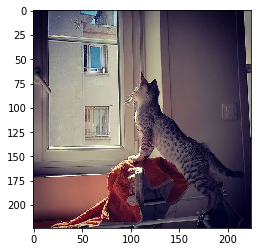

(1, 224, 224, 3)

In [2]:
# Here is a picture of my cat
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

def read_image(url, resize=None):
    response = requests.get(url)
    original = load_img(BytesIO(response.content), target_size=resize)
    print('PIL image size', original.size)
    plt.imshow(original)
    plt.show()
    return np.expand_dims(img_to_array(original), axis=0)

size = (224, 224)
catpic = read_image('https://scontent-cdg2-1.cdninstagram.com/vp/881afc46a11169af284c1d127bd801db/5D36BF6D/t51.2885-15/sh0.08/e35/s640x640/50618325_175774053397267_6165133886222118526_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com', resize=size)
catpic.shape

In [4]:
# Predict with local model
preds = model.predict(catpic)
decode_predictions(preds)

[[('n02124075', 'Egyptian_cat', 0.7144302),
  ('n04209239', 'shower_curtain', 0.09207407),
  ('n03742115', 'medicine_chest', 0.08303187),
  ('n02127052', 'lynx', 0.026781972),
  ('n04070727', 'refrigerator', 0.012636705)]]

In [16]:
# Predict with Blazee model
pred = bm.predict(catpic)
decode_predictions(np.array([pred.probas]))

[[('n02124075', 'Egyptian_cat', 0.7144302129745483),
  ('n04209239', 'shower_curtain', 0.09207406640052795),
  ('n03742115', 'medicine_chest', 0.08303187042474747),
  ('n02127052', 'lynx', 0.026781972497701645),
  ('n04070727', 'refrigerator', 0.012636705301702023)]]